#  <center> Data wrangling and Exploration </center>
### <center> by </center>
## <center> Shedrack David</center>

### Overview

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. WeRateDogs has over 4 million followers and has received international media coverage. I will wrangle 3 different data from this account for my analysis.

The wrangled dataset contains 1,986 values with 23 columns:
- tweet_id 
- timestamp
- source
- about_dog
- expanded_urls
- rating_numerator
- rating_denominator
- name
- stage
- jpg_url
- img_num
- p1
- p1_conf
- p1_dog
- p2
- p2_conf
- p2_dog
- p3
- p3_conf
- p3_dog
- created_at
- favorite_count
- retweet_count

### Data Gathering

For this project, i gathered three pieces of data and loaded them in the notebook. The methods used to gather each data was different.
- I directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) which was provided by udacity.com
- I used the Requests library to download the tweet image prediction (image_predictions.tsv) from a link.
- I used the Tweepy library to query additional data via the Twitter API and stored this data in newline for each tweet(tweet_json.txt)

### Accessing data, cleaning and storing data

- Here, I checked for data quality and tidiness and it was done both programatically using pandas functions like .info(), .duplicated(), .sample() and through observation of the data
- In tidy data each variable forms a column, each observation forms a row, each type of observational unit forms a table. i made sure all dataframe followed these rules by removing retweets from each dataframe, renaming abigious columns, changing wrong datatypes of entries to their appropraite datatype.
- Before cleaning, a copy of each dataframe's original was made using the .copy() function.
- After cleaning each data with code, i wrote a test code to check or assert that my data was clean using assert statement.
- After the entire cleaning process and merging of the three dataframes into one, gathered, assessed, and cleaned master dataset was saved to a CSV file named "twitter_archive_master.csv".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib import rcParams
from functools import reduce

%matplotlib inline


### Brief view of the finished wrangled dataset

In [2]:
df_clean = pd.read_csv('twitter_archive_master.csv')
df_clean.head()

,tweet_id,timestamp,source,about_dog,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01 16:23:56+00:00,33698,6970
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01 00:17:27+00:00,29225,5272
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31 00:18:03+00:00,21978,3464
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30 15:58:51+00:00,36793,7191
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29 16:00:24+00:00,35185,7718


In [3]:
df_clean.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.986000e+03,1986.000000,1986.000000,1986.000000,1986.000000,1.986000e+03,1.986000e+03,1986.000000,1986.000000
mean,7.356142e+17,12.281974,10.534240,1.203424,0.593452,1.344853e-01,6.034994e-02,7680.720544,2232.468278
std,6.740686e+16,41.581180,7.335369,0.561492,0.271961,1.005944e-01,5.091948e-02,11331.489092,3998.968171
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,66.000000,11.000000
25%,6.758214e+17,10.000000,10.000000,1.000000,0.362656,5.407533e-02,1.624755e-02,1631.750000,493.250000
50%,7.082494e+17,11.000000,10.000000,1.000000,0.587357,1.175370e-01,4.952715e-02,3445.500000,1076.500000
75%,7.873791e+17,12.000000,10.000000,1.000000,0.844920,1.951377e-01,9.166433e-02,9511.500000,2542.250000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,144256.000000,70335.000000


### Variables associated with dog stage


##### population
even though there are 7 stages of dogs in the dataset, the most populated stage of dog in the data set is puppo

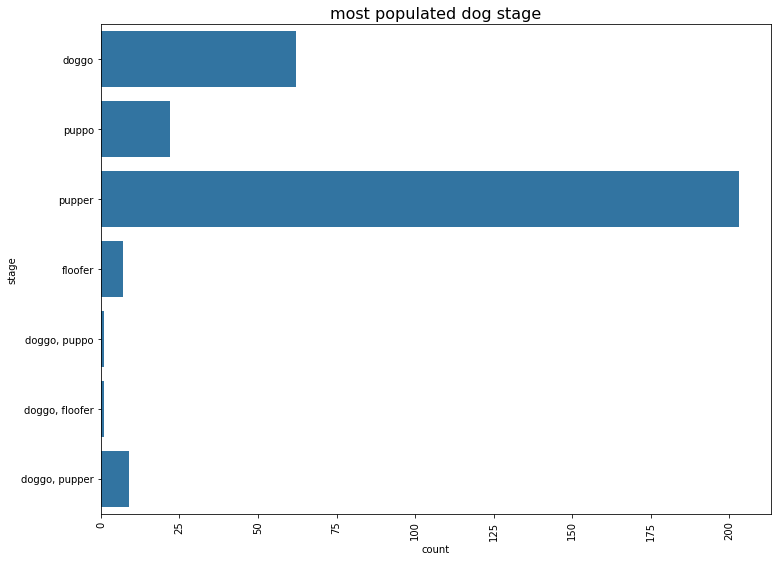

In [4]:
dc = sns.color_palette()[0]
plt.figure(figsize=[12, 9])
sns.countplot(data= df_clean, y = 'stage', color=dc);

plt.title("most populated dog stage", fontsize=16)
plt.xticks(rotation="vertical");

##### Group

there are 3 groups of dog, p1_conf, p2_conf and p3_conf.
most dogs fall in the p1_conf group

Text(0, 0.5, 'Average')

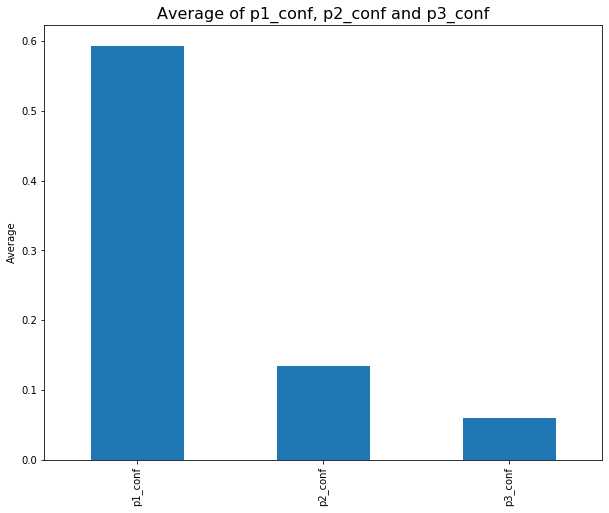

In [5]:
plt.figure(figsize=[10,8])
df_clean[['p1_conf','p2_conf', 'p3_conf']].mean().plot(kind='bar');

plt.title('Average of p1_conf, p2_conf and p3_conf',fontsize=16)
plt.ylabel('Average')

### Correlation between variables 

##### retweet count and favorite count

These two variables are very positively correlated, meaning dogs which got high favoite numbers tend to be highly retweeted

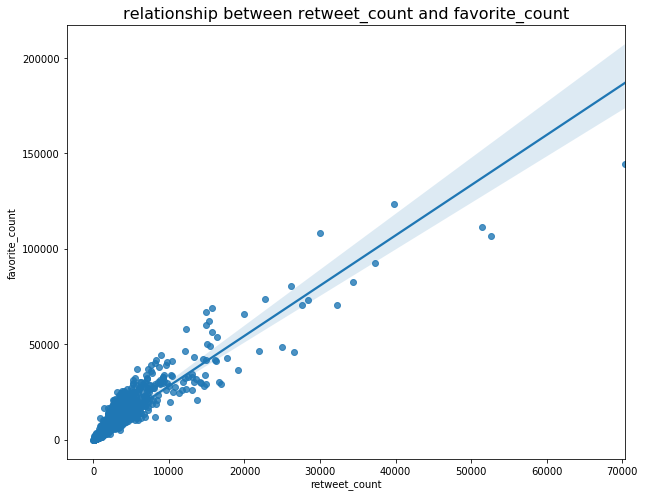

In [6]:
plt.figure(figsize=[10,8])
sns.regplot(x='retweet_count', y='favorite_count', data=df_clean)

plt.title('relationship between retweet_count and favorite_count', fontsize=16);



##### Dog stage and ratings

Although almost every dog in the tweeter account usually get high rating, the most rated stage of dogs is doggo puppo

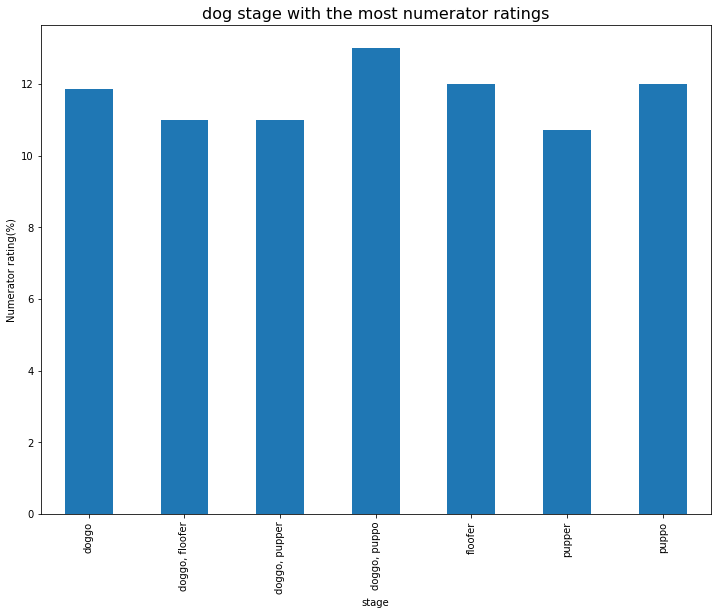

In [7]:
plt.figure(figsize=[12, 9])
df_clean.groupby('stage').mean().rating_numerator.plot(kind='bar');

plt.title('dog stage with the most numerator ratings', fontsize=16)
plt.ylabel("Numerator rating(%)");

##### stage and favorite count

since favorite count is strongly correlated to ratings, we expect that doggo puppo should also be the stage of dog which has the most favorite counts

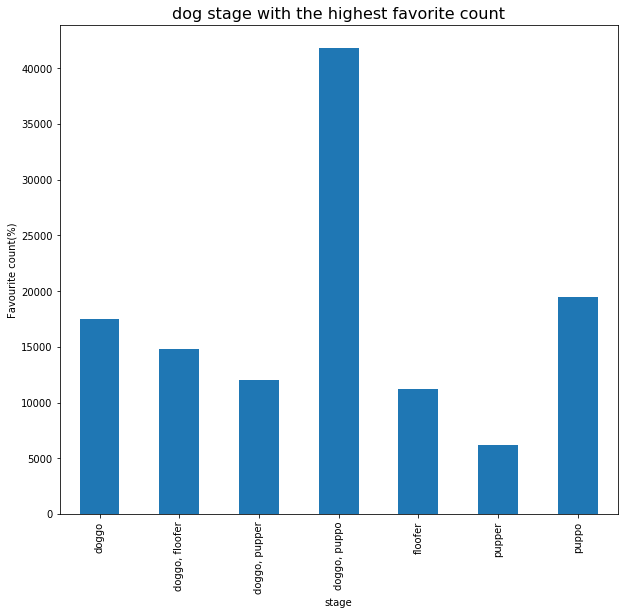

In [8]:
plt.figure(figsize=[10,9])
df_clean.groupby('stage').mean().favorite_count.plot(kind='bar');

plt.title('dog stage with the highest favorite count', fontsize=16)
plt.ylabel("Favourite count(%)");

In [10]:
# Create HTML slides without showing the code:
!jupyter nbconvert Wrangle_report.ipynb --to slides --no-input

[NbConvertApp] Converting notebook Wrangle_report.ipynb to slides
[NbConvertApp] Writing 483827 bytes to Wrangle_report.slides.html
